##### 偵測滑鼠事件
使用 OpenCV 建立視窗後，除了開啟圖片進行預覽，也可透過視窗偵測滑鼠的事件，進一步利用滑鼠和影像互動，\
這篇教學會介紹如何偵測滑鼠事件，以及取得滑鼠事件後進行的簡單應用 ( 標記、取得顏色...等 )。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 偵測滑鼠事件 
使用 cv2.setMouseCallback 方法，可以偵測指定視窗下的滑鼠事件，偵測事件後會透過一個特定的函式處理相關事件參數，\
每次發生滑鼠事件時會回傳四個參數，第一個是 event，第二個是 x 座標，第三個是 y 座標，第四個是 flag，下方的程式碼執行後，\
用滑鼠在視窗上滑動以及點擊，後台就會看見印出對應的數值。

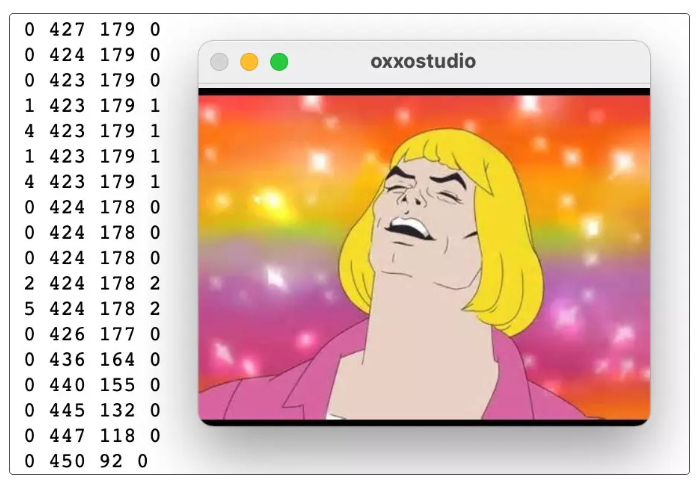

In [ ]:
import cv2

# 讀取影像
img = cv2.imread('image\Dog.jpg')

# 定義滑鼠事件的回呼函式
def show_xy(event, x, y, flags, userdata):
    print(event, x, y, flags)

# 顯示影像
cv2.imshow('oxxostudio', img)

# 設定滑鼠事件的回呼函式
cv2.setMouseCallback('oxxostudio', show_xy)

# 等待按鍵事件並關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 滑鼠 event 與 flag 列表 
當滑鼠在指定視窗中滑動進行某些行為，都會觸發一些事件，相關事件列表如下：

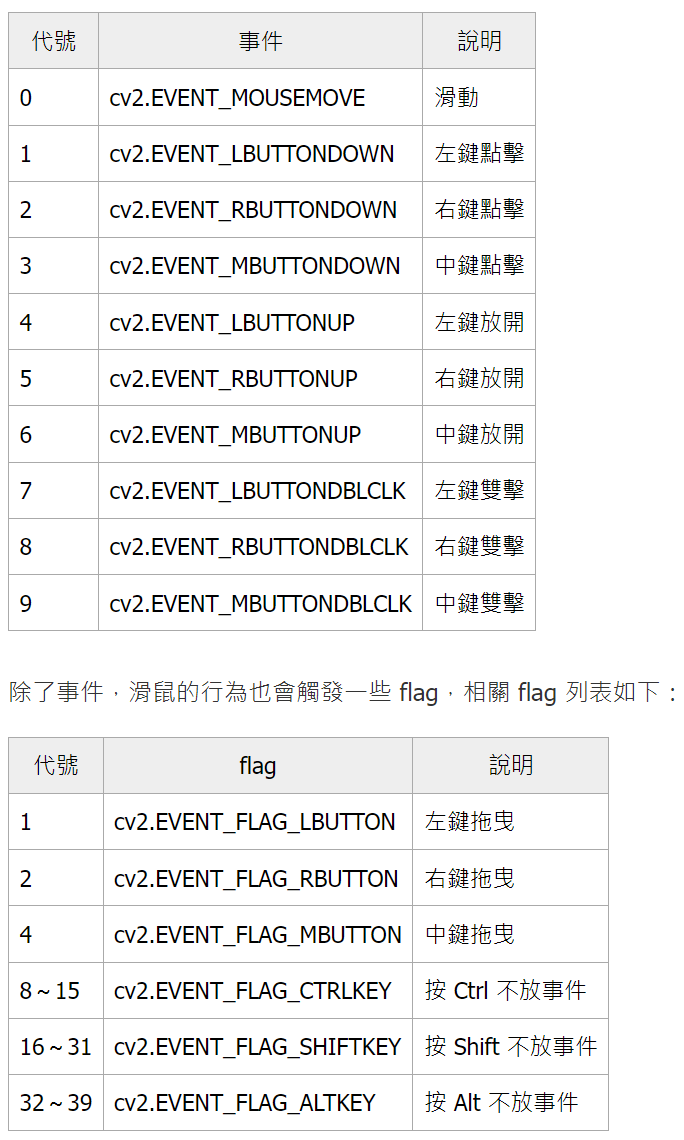


##### 透過滑鼠點擊，取得像素的顏色 
下方的程式碼，會使用一個黑色圓框標記滑鼠的位置，當點擊滑鼠時，會印出該位置像素的顏色。

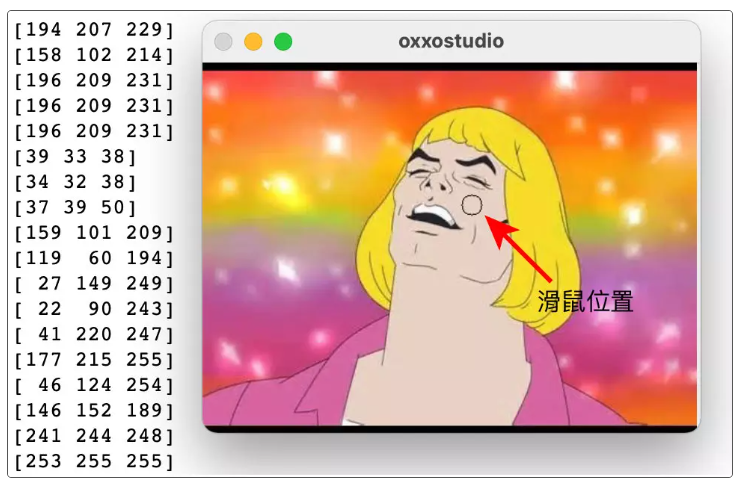

In [ ]:
import cv2
img = cv2.imread('image\Dog.jpg')

def show_xy(event,x,y,flags,param):
    if event == 0:                                # 當滑鼠移動時
        img2 = img.copy()                         # 當滑鼠移動時，複製原本的圖片
        cv2.circle(img2, (x,y), 10, (0,0,0), 1)   # 繪製黑色空心圓
        cv2.imshow('oxxostudio', img2)            # 顯示繪製後的影像
    if event == 1:                                # 當滑鼠點擊時
        color = img[y,x]                          # 當滑鼠點擊時
        print(color)                              # 印出顏色

cv2.imshow('oxxostudio', img)
cv2.setMouseCallback('oxxostudio', show_xy)

cv2.waitKey(0)
cv2.destroyAllWindows()

##### 透過滑鼠點擊，繪製多邊形 
下方的程式碼，會在點擊滑鼠時繪製一個實心圓形，並記錄該點擊時的座標，當座標數量大於 1 時，會透過兩個座標繪製直線。

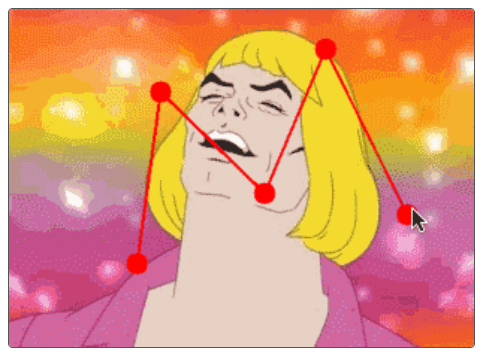

In [ ]:
import cv2
img = cv2.imread('image\Dog.jpg')

dots = []   # 記錄座標的空串列
def show_xy(event,x,y,flags,param):
    if event == 1:                                   # 當滑鼠點擊時
        dots.append([x, y])                          # 記錄座標
        cv2.circle(img, (x, y), 5, (0,0,255), -1)    # 在點擊的位置，繪製圓形
        num = len(dots)                              # 目前有幾個座標
        if num > 1:                                  # 如果有兩個點以上
            x1 = dots[num-2][0]                      # 取得倒數第二個座標
            y1 = dots[num-2][1]                      # 取得倒數第二個座標
            x2 = dots[num-1][0]                      # 取得最後的兩個座標
            y2 = dots[num-1][1]                      # 取得最後的兩個座標
            cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)  # 取得最後的兩個座標，繪製直線
        cv2.imshow('oxxostudio', img)

cv2.imshow('oxxostudio', img)
cv2.setMouseCallback('oxxostudio', show_xy)

cv2.waitKey(0)
cv2.destroyAllWindows()